# Credit Card Fraud Detection

Credit card fraud detection is one of the most important algorithms used by banks and financial organisations to protect themselves and consumers from malicious intent. Being able to detect potential fraud before the transaction is billed mitigates the risk for both consumer and financial institution. In this project, we will be creating using a machine learning algorithm to create a classifier that is able to classify a transaction as fraud or not.

## Credit Card Fraud Dataset

The dataset is a public dataset obtained from Kaggle. 

It contains the transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Exploratory Data Analysis

In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Load the csv file
df = pd.read_csv('creditcard.csv')

In [61]:
# Inspect dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
# Check summary of Amount
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [63]:
# Check for NaN values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there are no NaN values or null in our dataset.

In [64]:
# Check proportion of classes
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) *100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) *100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


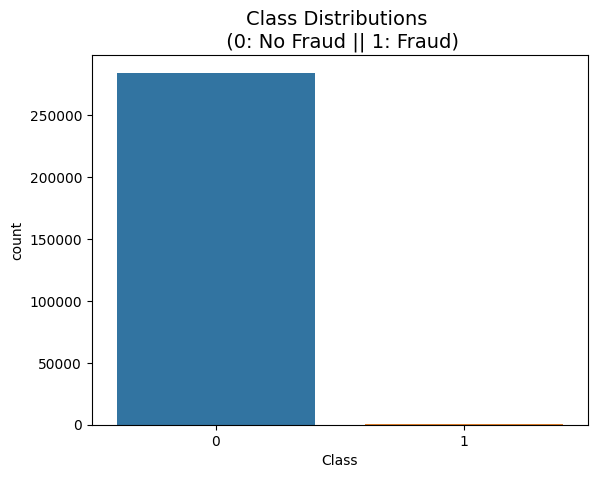

In [65]:
# Plot Countplot of classes
sns.countplot(x='Class', data=df, hue='Class', legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

As observed and calculated above, there is a significant class imbalance with 99.9% of transactions classified as non-fraud and 0.1% as fraud.

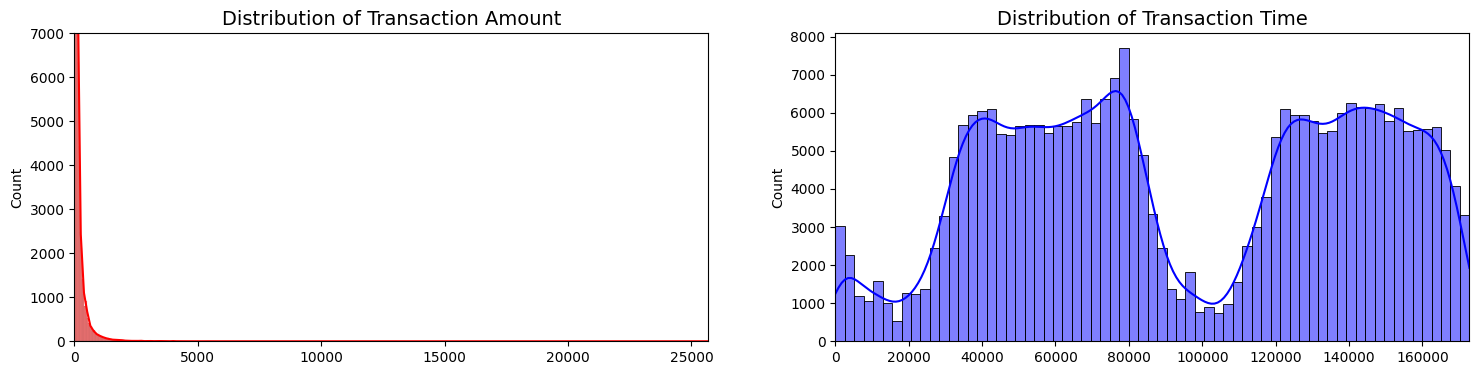

In [66]:
# Plot distribution of Transaction Amounts and Transaction Times
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_ylim([0, 7000])

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

We can observe that the majority of transaction amounts are low, with only a few transactions exceeding $5,000. From the plot of time of transactions, most of the transactions occur during the middle and towards the end of duration.

## Data Preprocessing

We will now apply a scaling technique to the 'Amount' and 'Time' feature to transform the range of values. We will use these new scaled features for our analysis. We use the robust scaler for scaling 'Amount' due to the presence of outliers, resulting in the algorithm to be less sensitive to extreme values.

In [67]:
# Scale 'Amount' and 'Time'
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [68]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Model Selection and Evaluation

We will now begin with building our models. We will first split our dataset into a train-validation-test set.

In [69]:
new_df = df.copy()

In [70]:
# Shuffle dataset
new_df = new_df.sample(frac=1, random_state=1)

In [71]:
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
169876,-0.282401,0.413715,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,0
127467,-0.279746,-0.074625,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,0
137900,-0.294977,-0.027138,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0
21513,-0.084119,-0.622364,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,0
134700,-0.296793,-0.044279,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,32.002515,-0.622963,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,...,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,0
117583,2.086495,-0.117048,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,...,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,0
73349,-0.201495,-0.347713,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,...,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,0
267336,1.017257,0.916787,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,...,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,0


In [72]:
# Split dataset into train-validation-test set
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]

train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [73]:
# Split sets into features and response
X_train, y_train = train.drop('Class', axis=1), train['Class']
X_test, y_test = test.drop('Class', axis=1), test['Class']
X_val, y_val = val.drop('Class', axis=1), val['Class']

In [74]:
X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values
X_val, y_val = X_val.values, y_val.values

In [75]:
f1_scores_dict = {}

## Baseline

We will first begin our evaluation our evaluation using the training set as a baseline.

In [76]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.model_selection import RandomizedSearchCV

In [77]:
seed = 42
models = {
    'Logistic Regression': LogisticRegression(random_state=seed),
    'Random Forest Classifier': RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=seed),
    'XGB Classifier': xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=1, random_state=seed)
}

def classifier_comparison(X_train, y_train, X_test, y_test, models, sampling_type):
    f1_scores = {}
    for name, model in models.items():
        print(name)
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        f1_value = round(f1_score(y_test, y_pred), 4)
        f1_scores[name] = f1_value
        
        print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
    
        confusion_matrix_dt = confusion_matrix(y_test, y_pred)
        sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
        
    f1_scores_dict[sampling_type] = f1_scores

Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.78      0.50      0.61        36

    accuracy                           1.00     22807
   macro avg       0.89      0.75      0.80     22807
weighted avg       1.00      1.00      1.00     22807



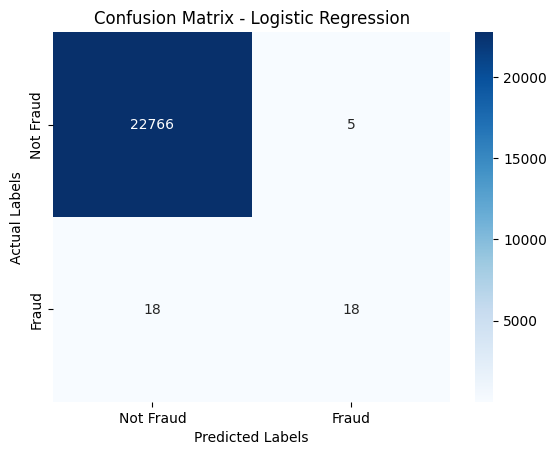

Random Forest Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



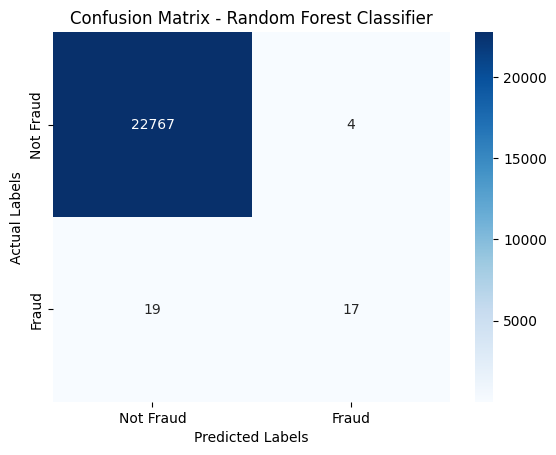

XGB Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.76      0.61      0.68        36

    accuracy                           1.00     22807
   macro avg       0.88      0.81      0.84     22807
weighted avg       1.00      1.00      1.00     22807



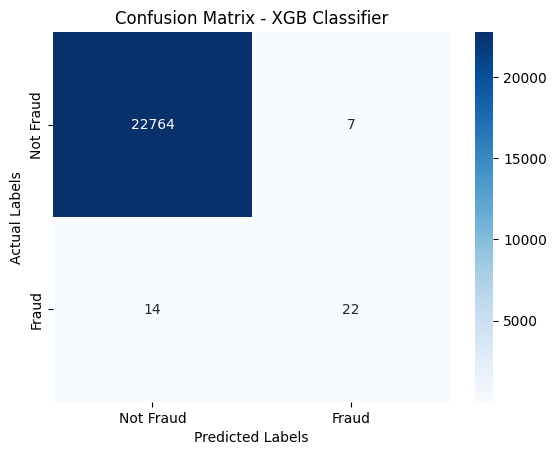

In [78]:
classifier_comparison(X_train, y_train, X_val, y_val, models, 'Baseline')

We can see that the accuracy for all these models are significantly high, around 99%. However, the accuracy is not a indicative measure to evaluate the performance of our model due to the class imbalanced. Therefore, the f1 score, precision and recall are better metrics. We can see that the highest f1 score is equal to 0.68 for the XGBoost, with only both 7 false positives and 14 false negatives. Therefore, the best baseline model is the XGBoost.

## Undersampling

One of the strategies to handle class imbalances is to undersample. Undersampling involves randomly removing observations from the abundant class such that it will have a similar number of observations with respect to the minority class. 

In [79]:
from imblearn.under_sampling import RandomUnderSampler

In [80]:
rus = RandomUnderSampler(random_state=seed)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) 

Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     22771
       Fraud       0.05      0.94      0.09        36

    accuracy                           0.97     22807
   macro avg       0.52      0.96      0.54     22807
weighted avg       1.00      0.97      0.98     22807



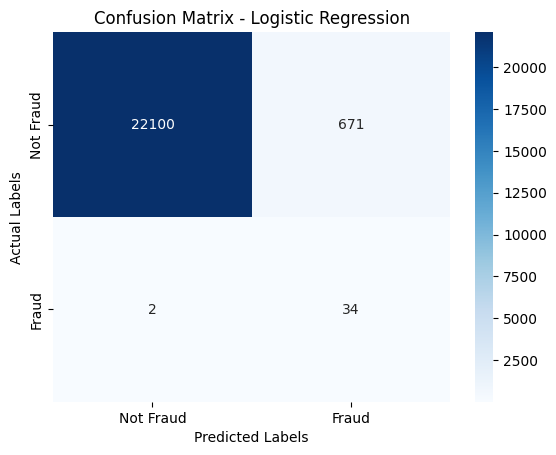

Random Forest Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.24      0.83      0.38        36

    accuracy                           1.00     22807
   macro avg       0.62      0.91      0.69     22807
weighted avg       1.00      1.00      1.00     22807



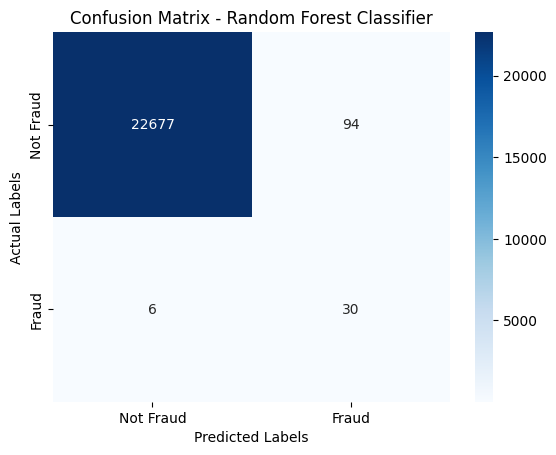

XGB Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.07      0.92      0.13        36

    accuracy                           0.98     22807
   macro avg       0.53      0.95      0.56     22807
weighted avg       1.00      0.98      0.99     22807



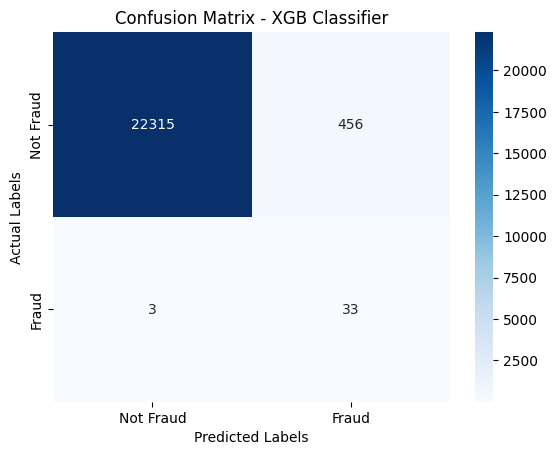

In [81]:
classifier_comparison(X_train_rus, y_train_rus, X_val, y_val, models, 'Random Under Sampling')

## Edited Nearest Neighbours

Edited Nearest Neighbours is another undersampling technique. Instead of randomly removing observations from the majority class, it identifies redundant and noisy instances within the majority class. The fundamental principle underlying ENN is to remove instances that are misclassified by their nearest neighbours, with the assumption that such instances are likely to be mislabeled or noisy.

In [82]:
from imblearn.under_sampling import EditedNearestNeighbours

In [83]:
# Resample training date
ENN = EditedNearestNeighbours()

X_train_ENN, y_train_ENN = ENN.fit_resample(X_train, y_train)

In [84]:
_, counts = np.unique(y_train_ENN, return_counts=True)
print("Non-Fraud:", counts[0])
print("Fraud:", counts[1])
print(f"{239589-counts[0]} Non-Fraud Observations were removed")

Non-Fraud: 239451
Fraud: 411
138 Non-Fraud Observations were removed


Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.78      0.58      0.67        36

    accuracy                           1.00     22807
   macro avg       0.89      0.79      0.83     22807
weighted avg       1.00      1.00      1.00     22807



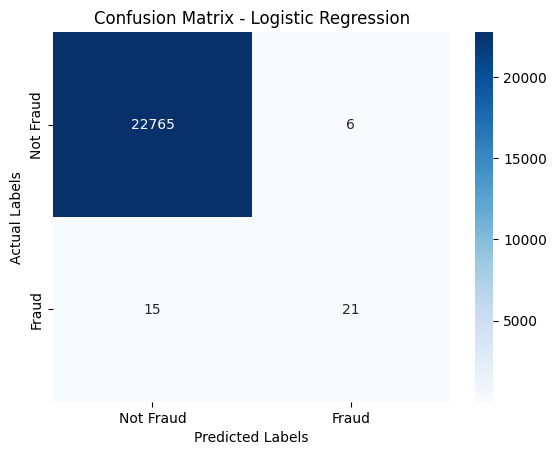

Random Forest Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



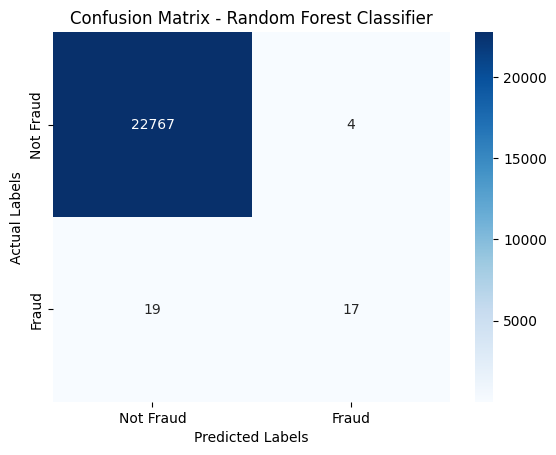

XGB Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.76      0.61      0.68        36

    accuracy                           1.00     22807
   macro avg       0.88      0.81      0.84     22807
weighted avg       1.00      1.00      1.00     22807



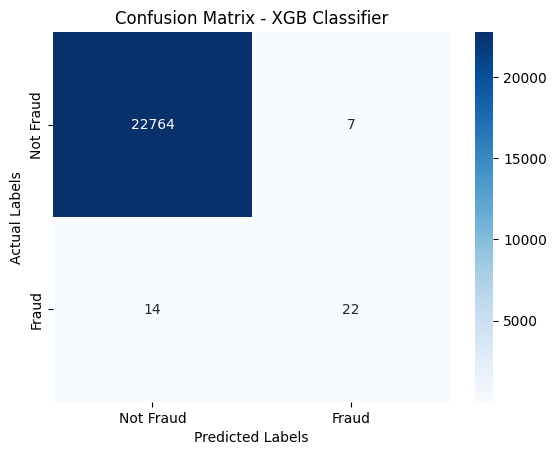

In [85]:
# Train models using undersampled training set
classifier_comparison(X_train_ENN, y_train_ENN, X_val, y_val, models, 'ENN')

ENN has resulted in a similar result compared to the baseline model.

## Oversampling

Another strategy to deal with class imbalances is to oversample. This involves randomly duplicating the minority class observations until it has a similar number of observations to the abundant class. 

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=seed)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", pd.Series(y_train_ros).value_counts())

Class distribution after oversampling: 0    239589
1    239589
Name: count, dtype: int64


Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.06      0.97      0.11        36

    accuracy                           0.98     22807
   macro avg       0.53      0.97      0.55     22807
weighted avg       1.00      0.98      0.99     22807



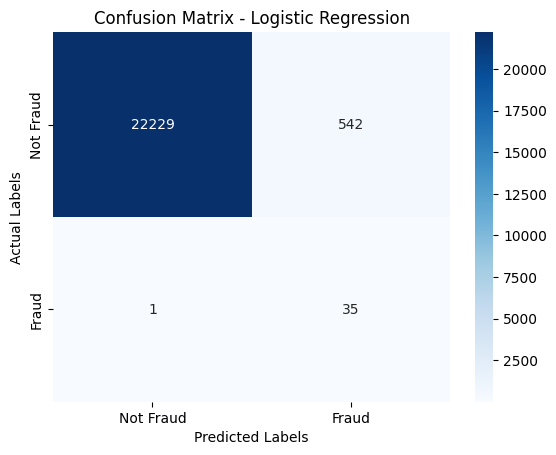

Random Forest Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.24      0.83      0.38        36

    accuracy                           1.00     22807
   macro avg       0.62      0.91      0.69     22807
weighted avg       1.00      1.00      1.00     22807



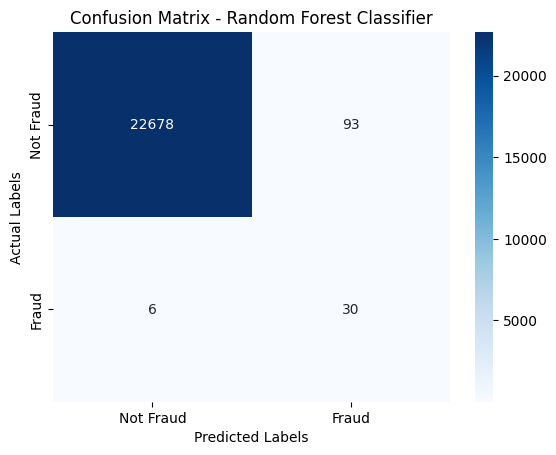

XGB Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.08      0.94      0.14        36

    accuracy                           0.98     22807
   macro avg       0.54      0.96      0.57     22807
weighted avg       1.00      0.98      0.99     22807



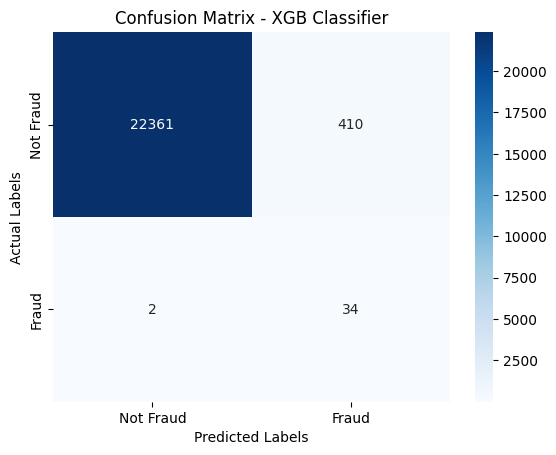

In [87]:
# Train models using oversampled training set
classifier_comparison(X_train_ros, y_train_ros, X_val, y_val, models, 'Random Over Sampling')

We can observe that compared to the baseline, the F1 score is still lower, with the highest F1 score belonging to the Random Forest Classifier again at 0.38. Similarly with undersampling, the precision score for fraud has a major influence on the overall F1 score.

The main problem with oversampling is that it is prone to overfitting if the minority class has a small sample size as it the model will learn noise if the original dataset is noisy or complex.

## SMOTE

Synthetic Minority Oversampling Technique (SMOTE) is a another method of oversampling that addressing overfitting. It does this by synthetically creating new data through augmentation of the minority class.

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=seed)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [89]:
print("Class distribution after oversampling:", pd.Series(y_train_SMOTE).value_counts())

Class distribution after oversampling: 0    239589
1    239589
Name: count, dtype: int64


Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     22771
       Fraud       0.06      0.97      0.11        36

    accuracy                           0.97     22807
   macro avg       0.53      0.97      0.55     22807
weighted avg       1.00      0.97      0.99     22807



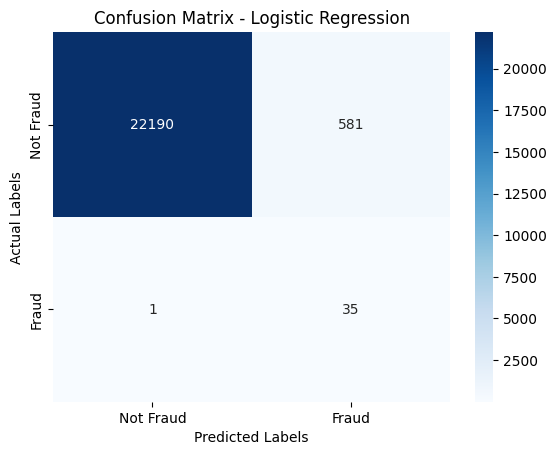

Random Forest Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.22      0.83      0.35        36

    accuracy                           1.00     22807
   macro avg       0.61      0.91      0.68     22807
weighted avg       1.00      1.00      1.00     22807



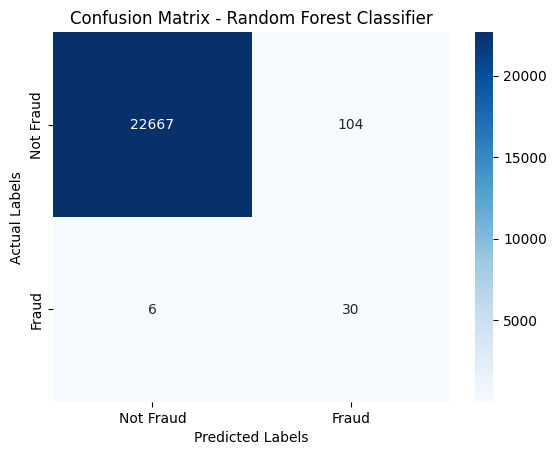

XGB Classifier
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.07      0.94      0.14        36

    accuracy                           0.98     22807
   macro avg       0.54      0.96      0.56     22807
weighted avg       1.00      0.98      0.99     22807



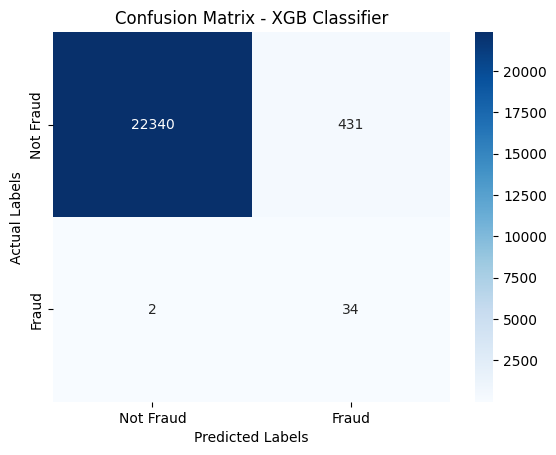

In [90]:
# Train models using oversampled training set
classifier_comparison(X_train_SMOTE, y_train_SMOTE, X_val, y_val, models, 'SMOTE')

We can observe extremely similar results with normal oversampling, that compared to the baseline, the F1 score is still lower, with the highest F1 score belonging to the Random Forest Classifier again at 0.35. 

Therefore, SMOTE does not result in a better model.

## Class Weights

Instead of resampling the dataset, we can modify the loss function to give more importance to the minority class. It does by adding a weight to each class, with a higher weight meaning a higher importance. When the minority class is incorrectly classified, it will result in a larger penalty than if the majority class is misclassified.

In [91]:
f1_scores_dict['Class Weights'] = {}

weights = {0: 1, 1: 10}

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.63      0.81      0.71        36

    accuracy                           1.00     22807
   macro avg       0.82      0.90      0.85     22807
weighted avg       1.00      1.00      1.00     22807



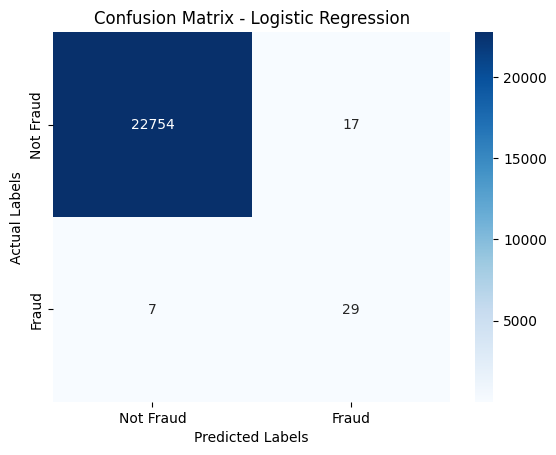

In [92]:
lgr = LogisticRegression(class_weight=weights, random_state=seed)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_val)

print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
f1_scores_dict['Class Weights']['Logistic Regression'] = round(f1_score(y_val, y_pred), 4)
    
confusion_matrix_dt = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.77      0.67      0.72        36

    accuracy                           1.00     22807
   macro avg       0.89      0.83      0.86     22807
weighted avg       1.00      1.00      1.00     22807



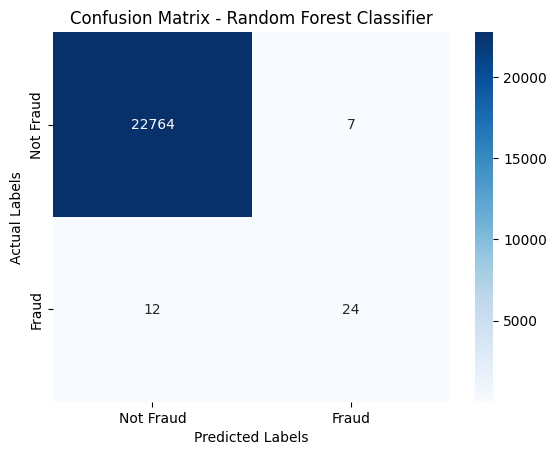

In [93]:
rf = RandomForestClassifier(max_depth=2, n_jobs=-1, class_weight=weights, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
f1_scores_dict['Class Weights']['Random Forest Classifier'] = round(f1_score(y_val, y_pred), 4)
    
confusion_matrix_dt = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.07      0.94      0.14        36

    accuracy                           0.98     22807
   macro avg       0.54      0.96      0.56     22807
weighted avg       1.00      0.98      0.99     22807



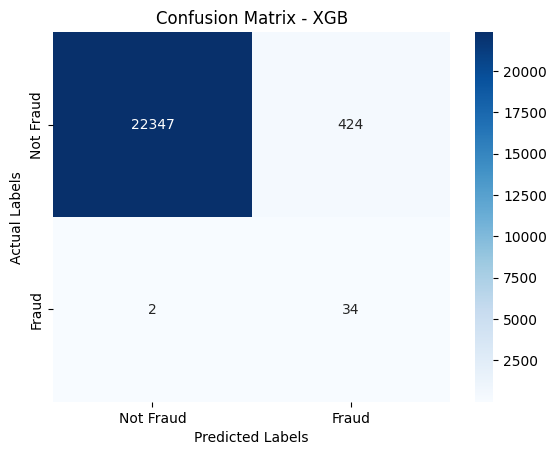

In [94]:
clf = xgb.XGBClassifier(n_estimators=50, 
                        learning_rate=0.1, 
                        max_depth=1,
                        random_state=seed,
                        scale_pos_weight = pd.Series(y_train).value_counts()[0]/pd.Series(y_train).value_counts()[1])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
f1_scores_dict['Class Weights']['XGB Classifier'] = round(f1_score(y_val, y_pred), 4)
    
confusion_matrix_dt = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGB')
plt.show()

## Model Comparison

In [95]:
f1_scores_df = pd.DataFrame(f1_scores_dict).transpose()
f1_scores_df

,Logistic Regression,Random Forest Classifier,XGB Classifier
Baseline,0.6102,0.5965,0.6769
Random Under Sampling,0.0918,0.3750,0.1257
ENN,0.6667,0.5965,0.6769
Random Over Sampling,0.1142,0.3774,0.1417
SMOTE,0.1074,0.3529,0.1357
Class Weights,0.7073,0.7164,0.1377


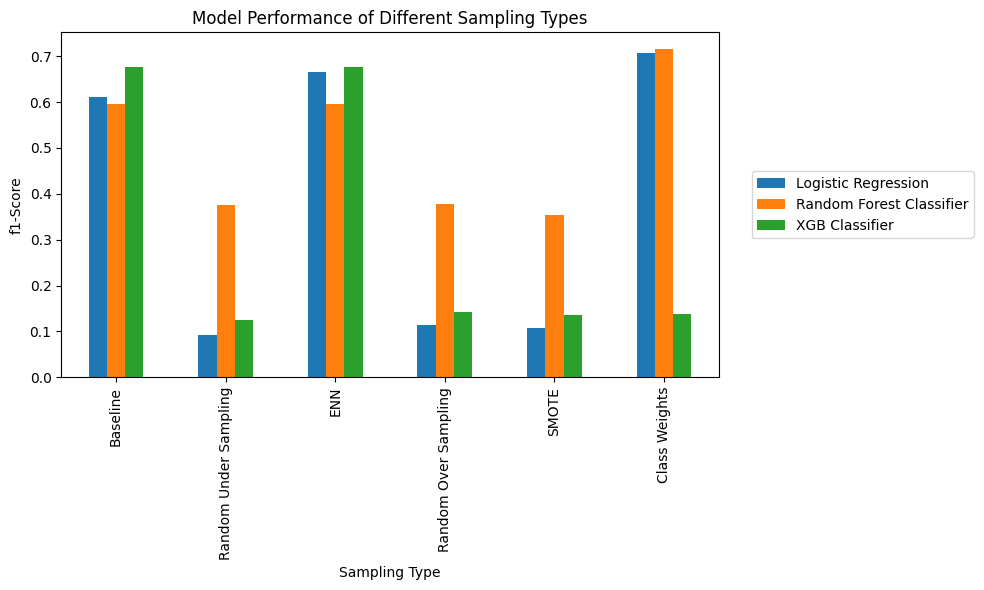

In [103]:
f1_scores_df.plot(kind='bar', figsize=(10,6))
plt.ylabel('f1-Score')
plt.xlabel('Sampling Type')
plt.title('Model Performance of Different Sampling Types')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Based on the bar plot, we can see that the Random Forest Classifier with adjusted weight classes obtained the highest f1-score, with a score of 0.7164. This only shows slight improvement in model performance compared to the baseline but it is significantly better than the other models.

## Model Evaluation

Now that we have select the best model, we will now use cross validation to make the model more robust and perform hyperparameter tuning to improve our model.

In [97]:
# Combine train and validation set

X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

In [98]:
# Random Forest Classifier
rf_params = {
    'n_estimators': [20, 50, 100],
    'max_depth': [5],
    'class_weight': ['balanced', {0: 1, 1: 10}, {0:1, 1:20}, {0:1, 1:100}]
    }
grid_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, random_state=seed)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
rf = grid_rf.best_estimator_

{'n_estimators': 50, 'max_depth': 5, 'class_weight': {0: 1, 1: 20}}


In [99]:
y_pred = rf.predict(X_test)

f1 = f1_score(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21960
           1       0.80      0.90      0.85        40

    accuracy                           1.00     22000
   macro avg       0.90      0.95      0.92     22000
weighted avg       1.00      1.00      1.00     22000



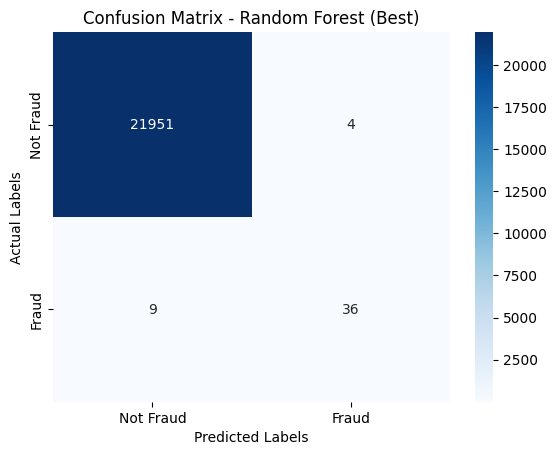

In [100]:
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest (Best)')
plt.show()

In [101]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall values
y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

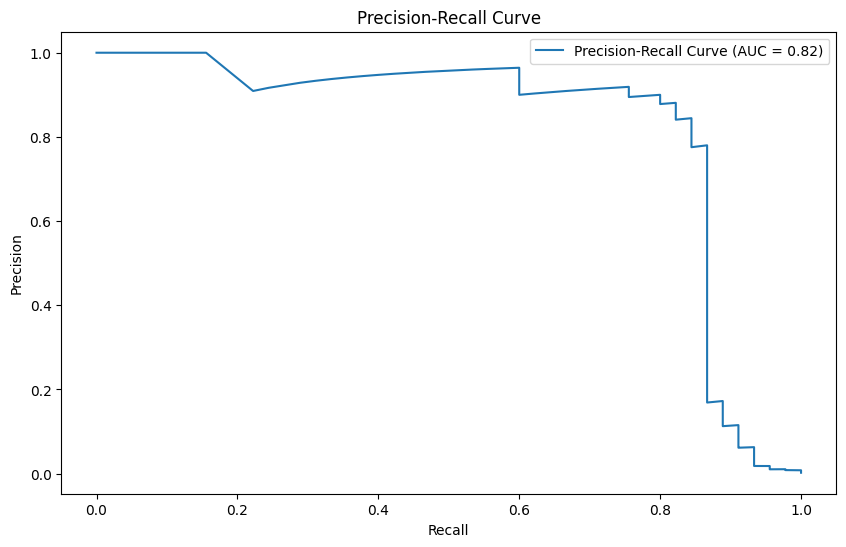

In [102]:
# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

From this precision-recall plot, we can see that the curve is positioned towards the top right of the plot, illustrating that the classifier has a high precision and recall for different thresholds. The AUC is calculated to be 0.82.

## Discussion and Conclusion

Due to the nature of credit risks fraud observations and the imbalanced class distribution, we were able to demonstrate that by introducing resampling techniques, we were able to select a classifier that performs better than the baseline model, which did not involve any resampling techniques. As a result of the imbalanced class distribution, the main metric used to assess performance was the f1-score, with correctly identifying positive observations more important than negative as false negative are much more dentrimental to a business. The Random Forest Classifier with adjusted class weights was determined to be the best performing classifier, achieving an f1-score of 0.84, with only 4 out of 40 false positives and 9 out of 45 positives missed. This is much better than the baseline models, with the best achieving a recall of 0.68. Other resampling techniques were also conducted such as RUS, ROS, SMOTE and ENN. However, RUS, SMOTE and ROS were observed to perform significantly worse than the baseline model whereas ENN performed similarly to the baseline model.

Strategies that can further improve this analysis:
- Model - Deep Learning Model and Support Vector Classifier
- Hyperparameter Tuning - Grid Search instead of Randomized Search